In [43]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from util.cifar10_loader import Cifar10Loader
from util.data_visualizer import DataVisualizer

### Load and Visualize CIFAR 10 Data into train, test

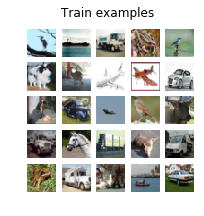

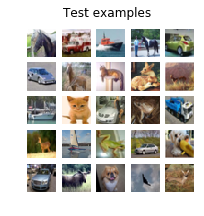

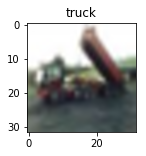

In [546]:
model_path = './models'
data_loader = Cifar10Loader()
dv = DataVisualizer()

X_train, y_train, X_test, y_test, labels = data_loader.load_cifar10('./Datasets/cifar-10')

# data_visualizer expects unflatted images
dv.visualize_data(X_train, 'Train examples')
dv.visualize_data(X_test, 'Test examples')

# Flatten data
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Verify Flattened data
image_id = 2
dv.visualize_image(X_train[image_id].reshape(32, 32, 3), labels[y_train[image_id]])

# Nearest neighbor class

### Concepts

- L1 vs. L2: It is interesting to consider differences between the two metrics. In particular, the L2 distance is much more unforgiving than the L1 distance when it comes to differences between two vectors. That is, the L2 distance prefers many medium disagreements to one big one. L1 and L2 distances (or equivalently the L1/L2 norms of the differences between a pair of images) are the most commonly used special cases of a p-norm.

- we cannot use the test set for the purpose of tweaking hyperparameters.

### TODO:
- Support k-NN
- Cross Validation for Hyper parameter decision (l1 vs l2; k)
- Normalize (z-score) data ?
- Dimensionality reduction by:
    - PCA
    - k-means clustering (ANN/FLANN)
- t-SNE

In [173]:
class NearestNeighbor:
    def __init__(self, norm = 'l2', verbose = True):
        if norm not in ['l1', 'l2']:
            raise ValueError("Unsupported distance type")
        self.norm = norm
        self.verbose = verbose
    
    def train(self, X, y):
        """
        Train the classifier
        Parameters
        ----------
        X: (N x ...) nd-array of dtype=float where N is the size of train dataset
        y: (N x 1) nd-array of dtype=int where N is the size of train dataset
        """
        self.num_train_data = X.shape[0]
        if self.num_train_data != y.shape[0]:
            raise ValueError("Train Data size and Label size don't match")
        self.num_dimensions = X.ndim
        self.X_train = X
        self.y_train = np.array(y, dtype=int)
        
    def _predict_single_image(self, X):
        if self.norm == 'l1':
            error = np.sum(np.abs(self.X_train - X), axis=tuple(range(1, self.num_dimensions)))
        else:
            error = np.sum(np.square(self.X_train - X), axis=tuple(range(1, self.num_dimensions)))
        return self.y_train[np.argmin(error)]        

    def predict(self, X):
        """
        Predict using the trained classifier
        Parameters
        ----------
        X: (N x ...) nd-array of dtype=float where N is the size of dataset
        Returns:
        y: (N x 1) nd-array of dtype=int where N is the size of train dataset
        """
        if self.num_dimensions != X.ndim:
            raise ValueError("Dimensions of X don't match to that of Train Data")
        pred = []
        for i, image in enumerate(X):
            pred.append(self._predict_single_image(image))
            if self.verbose is True and i%100 == 0:
                print('Predicted for {} images'.format(i+1))
        return np.array(pred, dtype=int)
    
    def get_accuracy(self, y_ground_truth, y_predicted):
        """
        Computes accuracy
        Parameters
        ----------
        y_ground_truth: (N x 1) nd-array of dtype=int
        y_predicted: (N x 1) nd-array of dtype=int
        Returns:
        accuracy of type float
        """
        return(100*np.mean(y_predicted == y_ground_truth))

### Test NN class

In [174]:
num_test_images = 100
nn = NearestNeighbor(norm = 'l1', verbose=False)
nn.train(X_train, y_train)
y_pred = nn.predict(X_test[:num_test_images])
print("Accuracy (l1 norm) = ", nn.get_accuracy(y_test[:num_test_images], y_pred))

nn = NearestNeighbor(norm = 'l2', verbose=False)
nn.train(X_train, y_train)
y_pred = nn.predict(X_test[:num_test_images])
print("Accuracy (l2 norm) = ", nn.get_accuracy(y_test[:num_test_images], y_pred))

Accuracy (l1 norm) =  34.0
Accuracy (l2 norm) =  31.0
